In [2]:
import numpy as np

# Библиотека `numpy`

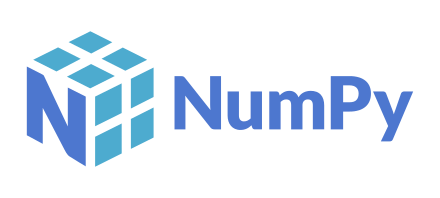

Пакет `numpy` предоставляет $n$-мерные однородные массивы (все элементы одного типа); в них нельзя вставить или удалить элемент в произвольном месте. В `numpy` реализовано много операций над массивами в целом. Если задачу можно решить, произведя некоторую последовательность операций над массивами, то это будет столь же эффективно, как в `C` или `matlab` — львиная доля времени тратится в библиотечных функциях, написанных на `C`.

## 1. Массивы


#### 1.1 Типы массивов, атрибуты

Можно преобразовать список в массив функцией `np.array()`. Все элементы в списке должны быть одного типа.

In [6]:
a = np.array([0, 2, 1])
b = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
a, type(a)

(array([0, 2, 1]), numpy.ndarray)

Тип numpy-массива - `ndarray`, то есть многомерный массив. Узнать его размерность можно через атрибут `a.shape`

In [8]:
print(a.shape)
print(b.shape)

(3,)
(3, 3)


`numpy` предоставляет несколько типов для целых (`int16`, `int32`, `int64`) и чисел с плавающей точкой (`float32`, `float64`). Тип элементов массива можно получить по атрибуту `.dtype`, а сколько он занимает памяти через `.itemsize`

In [9]:
a.dtype, a.dtype.name, a.itemsize

(dtype('int32'), 'int32', 4)

При создании массива можно указать тип его элементов через аргумент `dtype`. Также можно изменить тип элементов существующего массива методом `astype()`

In [12]:
c = np.array([1, 2, 3, 4], dtype=np.float64)
print(c.dtype)
print(c.astype(int))
print(c.astype(str))

float64
[1 2 3 4]
['1.0' '2.0' '3.0' '4.0']


**Вопросы для самоконтроля**:
- Какой метод создает `ndarray` на основе списка?
- Как узнать размеры `ndarray`, тип хранимых в нем элементов?
- Какой метод позволяет поменять тип элементов массива?

**Упражнение:** создайте numpy-массив, состоящий из первых пяти простых чисел, выведите его размеры, тип, измените его тип на `float64`.

**Решение:**

#### 1.2 Индексация

Индексировать массив можно обычным образом, срезами, массивом индексов и булевым массив.

In [21]:
a = np.array([-2, -1, 0, 1, 2])
print(a[0], a[-1]) #обычное индексирование, первый и последний элементы
print(a[1: a.shape[0]-1]) #индексирование срезом
print(a[ [0, 2, 4] ]) #индексирование списком индексов, вернет жлементы по индексам, указанным в массиве
print(a >= 0) #булев массив (подробнее о нем позже)
print(a[a>=0]) #вернет те элементы, для которых булево выражение истинно, то есть неотрицательные

-2 2
[-1  0  1]
[-2  0  2]
[False False  True  True  True]
[0 1 2]


Можно менять не только отдельные элементы массива, но и срезы целиком.

In [26]:
a = np.array([-2, -1, 0, 1, 2])
a[1:-1] = -10
print(a)
a[a==-10] = 0
print(a)

[ -2 -10 -10 -10   2]
[-2  0  0  0  2]


Способы выше работают и для многомерных массивов, только срезы в квадратных скобках нужно делать для каждой размерности через запятую.

In [75]:
a = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])
print(a[0], a[-1])
print()
print(a[1:-1, 1:-1])
print()
print(a[[0, 2], :])

[1 2 3 4] [13 14 15 16]

[[ 6  7]
 [10 11]]

[[ 1  2  3  4]
 [ 9 10 11 12]]


Массивы, разумеется, можно использовать в `for` циклах. Но при этом теряется главное преимущество `numpy` — быстродействие. Всегда, когда это возможно, лучше использовать операции над массивами как едиными целыми.

In [76]:
for i in a:
    print(i)

[1 2 3 4]
[5 6 7 8]
[ 9 10 11 12]
[13 14 15 16]


**Вопросы для самоконтроля**:
- Какими способами можно получить доступ к элементам массива и изменить их значения? (4 способа)
- Стоит ли избегать использования массивов с циклом `for`? Почему?

**Упражнение:** Дан numpy-массив, в которох хранятся возрасты людей. При его заполнении были допущены ошибки и некоторые числа не имеют смысла, замените их значения нулями.
Массив - `a = np.array([0, 1, -2, 3, -4, 5, -6, 7, -8, 9])`.

**Решение:**

**Упражнение:** Дана матрица в виде массива numpy размера 4 на 4, нужно получить подматрицу, в которую не входят элементы на границе.
`a = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])`

**Решение:**

#### 1.3 Создание массивов

Изменить размер массива нельзя, поэтому на практике часто бывает удобно заранее создать массив из нйлей или единиц нужного размера, а потом заполнять его нужными значениями.
Для создания массива из нулей - `np.zeros(n)`, из единиц - `np.ones(n)`, `n` - размер.

In [35]:
a = np.zeros(3)
b = np.ones((3, 3), dtype=np.int64)
print(a)
print(b)
c = np.zeros_like(b) # длина и тип c будут такими же как у b
c

[0. 0. 0.]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

Как известно `range` может принимать только целые аргументы. В numpy есть функция `arange`, которая работает так же, но может принимать и дробные значения(удобно, правда?)
Следует избегать ситуаций, когда *(конец-начало)/шаг* — целое число, потому что в этом случае включение последнего элемента зависит от ошибок округления. 
Последовательность чисел с постоянным шагом можно также создавать функцией `linspace`, начало и конец диапазона включаются, последний аргумент - число точек.

In [31]:
a = np.arange(0, 9, 2)
print(a)
b = np.arange(0., 9, 2)
print(b)
a = np.linspace(0, 8, 5)
print(a)
arr = np.linspace(10, 20, 21)
print(arr)

[0 2 4 6 8]
[0. 2. 4. 6. 8.]
[0. 2. 4. 6. 8.]
[10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5
 17.  17.5 18.  18.5 19.  19.5 20. ]


Последовательность чисел с постоянным шагом по логарифмической шкале от $10^0$ до $10^1$, можно создать функцией `logspace`.

In [32]:
b = np.logspace(0, 1, 5)
print(b)

[ 1.          1.77827941  3.16227766  5.62341325 10.        ]


Размер ономерного массива можно поменять методом `reshape()`, это бывает очень удобно на практике

In [58]:
a = np.arange(1, 9.5, 1).reshape((3, 3))
a

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

**Вопросы для самоконтроля**
- Почему в функции `arange` выржение *(конец-начало)/шаг* не должно быть целым числом?

**Упражнения:**
- Создайте массив размера (2, 2) из нулей, а потом из единиц.
- Создайте одномерный массив размера 4, превратите его в массив рамзера 2x2.
- Создайте и выведите последовательность чисел от 10 до 20 с постоянным шагом, длина последовательности - 21.
- Создайте и выведите последовательность чисел от $10^2$ до $10^3$ с постоянным по логарифмической шкале шагом, длина последовательности - 10.

**Решение:**

## 2. Операции над массивами

#### 2.1 Математические операции

Арифметические операции над массивами проводятся поэлементно. Причем, один из операндов может быть числом.

In [22]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
b = np.ones((3, 3))

print(a + b)
print()
print(a - 3*b)
print()
print(a * b)
print()
print(a /2)


[[ 2.  3.  4.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]

[[-2. -1.  0.]
 [ 1.  2.  3.]
 [ 4.  5.  6.]]

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

[[0.5 1.  1.5]
 [2.  2.5 3. ]
 [3.5 4.  4.5]]


Когда операнды разных типов, они приводятся к большему типу.

In [23]:
i = np.ones((3,3), dtype=np.float64)
print(a + i)

[[ 2.  3.  4.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]


Библиотека `numpy` содержит элементарные функции, которые тоже применяются к массивам поэлементно. Они называются универсальными функциями (`ufunc`).

In [16]:
np.sin, type(np.sin)

(<ufunc 'sin'>, numpy.ufunc)

In [52]:
print(np.sin(a))
print(np.exp(b))
print(np.sqrt(b))
print(np.exp(b))
print(np.log(b))
print(np.e, np.pi)

[[ 0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155 ]
 [ 0.6569866   0.98935825  0.41211849]]
[[2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
2.718281828459045 3.141592653589793


Сравнения дают булевы массивы. Эти массивы ранее использовались нами для сравнения.

In [28]:
print(a > b)
print()
print(a == b)
print()
print(b == 1)
print()
print(a < 5)

[[False  True  True]
 [ True  True  True]
 [ True  True  True]]

[[ True False False]
 [False False False]
 [False False False]]

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]

[[ True  True  True]
 [ True False False]
 [False False False]]


Вот еще несколько интересных функций:

In [38]:
print(np.any(a == 9)) #квантор существования
print(np.all(b == 1)) #квантор всеобщности
print("Сумма: ", a.sum()) #сумма элементов
print("Среднее: ", a.mean()) #среднее
print("Максимум: ", a.max()) #максимум
print("Среднеквадратическое отклонение: ", a.std()) #среднеквадратичное отклонение

True
True
Сумма:  45
Среднее:  5.0
Максимум:  9
Среднеквадратическое отклонение:  2.581988897471611


При выполнении операций над массивами деление на 0 не возбуждает исключения, а даёт значения `np.nan` или `np.inf`. Стоит заметить, что любые операции с `np.nan` вернут `np.nan`.

In [39]:
print(np.array([0.0, 0.0, 1.0, -1.0]) / np.array([1.0, 0.0, 0.0, 0.0]))

[  0.  nan  inf -inf]


C:\Users\KABabadzhanov\AppData\Local\Temp\ipykernel_27972\3088186758.py:1: RuntimeWarning: divide by zero encountered in divide
  print(np.array([0.0, 0.0, 1.0, -1.0]) / np.array([1.0, 0.0, 0.0, 0.0]))
C:\Users\KABabadzhanov\AppData\Local\Temp\ipykernel_27972\3088186758.py:1: RuntimeWarning: invalid value encountered in divide
  print(np.array([0.0, 0.0, 1.0, -1.0]) / np.array([1.0, 0.0, 0.0, 0.0]))


In [40]:
np.nan + 1, np.inf + 1, np.inf * 0, 1. / np.inf

(nan, inf, nan, 0.0)

Иногда бывает нужно использовать частичные (кумулятивные) суммы. В наших курсах такое может пригодится. `axis` - по какой оси будет проводится суммирование

In [50]:
print(a.cumsum(axis=1))

[[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]


Можно получить транспонированную матрицу атрибутом `.T`

In [80]:
a.T

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

Одна из самых полезных операций для двумерных массивов - матричное умножение `np.dot()` или `@`

In [54]:
print(np.dot(a, b))
a@b

[[ 6.  6.  6.]
 [15. 15. 15.]
 [24. 24. 24.]]


array([[ 6.,  6.,  6.],
       [15., 15., 15.],
       [24., 24., 24.]])

**Вопросы для самоконтроля**:
- Можно ли сложить числовые массивы типа `int16` и `float64`?
- Что делает атрибут `.T`
- Одинаково ли работают операции `*` и `@` для матриц, если нет, что в чем их различие?
- В чем отличие универсальных функции (`np.sin()`, `np.exp()` и т.д.) от аналогичных из модуля `math`
- Какие методы используются для нахождения максимума, минимума, среднего массива?
- Что получается при умножении(сложении) числа с `np.nan`?
- Чему равно `1.0 / 0.0` с точки зрения numpy?

**Упражнение:** создайте матрицы $\begin{pmatrix} -3 & 4 \\ 4 & 3 \end{pmatrix}$ и $\begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}$. Посчитайте их поэлементное и матричное произведения.

**Решение:**

**Упражнения:**
Пусть `a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])`, `b = np.array([[1, 1], [0, 0], [1, 1]]), c = np.array([-2, -1, 0, 1, 2])`,
- Какой массив вернет выражение c > 0?
- Перемножьте матрицу a на b.
- Вычислите c + 2, b - 1, a*a

**Решения:**

**Упражнения**

Пусть X = $\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix}$, $Y = (1, 2, 3)$, Y_pred = $(2, 3, 4)$

- При знакомстве с линейной регрессией мы выяснили, что если известны матрица `X` и вектор весов нашей линейной функции `w`, то предсказания нашей модели вычисляются по очень простой формуле(она будет на доске, я не умею в латех )0). Обозначая вектор предсказаний модели как `Yp`, вычислите его, используя numpy.

- При знакомстве с линейной регрессией нам приходилось вычислять MSE(формула наверно будет на доске, т.к. я не умею в латех).
Пусть даны векторы `Y`, `Yp` в виде `ndarray` размера n, где `Y` - истинные значения целевой переменной, а `Yp` - предсказанные. Вычислите, используя numpy, MSE.

- Используя формулу для градиента MSE, вычислите её, используя numpy.

**Решения**

#### 2.2 Сортировка, изменение массивов

Функция `sort` возвращает отсортированную копию, метод `sort` сортирует на месте.

In [8]:
a = np.array([1., 3., 5., 7., 9., 10.])
b = np.array([2.        , 1.18551961, 1.26491106, 1.6066895 , 2.22222222])
print(np.sort(b))
print(b)

[1.18551961 1.26491106 1.6066895  2.         2.22222222]
[2.         1.18551961 1.26491106 1.6066895  2.22222222]


Массивы можно объединить методом `np.hstack()`, расщепить по индексам методом `np.hsplit()`

In [10]:
a = np.hstack((a, b))
print(a)
np.hsplit(a, [3, 6])

[1.         3.         5.         7.         9.         2.
 1.18551961 1.26491106 1.6066895  2.22222222 2.         1.18551961
 1.26491106 1.6066895  2.22222222]


[array([1., 3., 5.]),
 array([7., 9., 2.]),
 array([1.18551961, 1.26491106, 1.6066895 , 2.22222222, 2.        ,
        1.18551961, 1.26491106, 1.6066895 , 2.22222222])]

Функции `delete`, `insert` и `append` не меняют массив на месте, а возвращают новый массив, в котором удалены, вставлены в середину или добавлены в конец какие-то элементы.

In [13]:
a = np.delete(a, [5, 7])
print(a)
a = np.insert(a, 2, [0, 0])
print(a)
a = np.append(a, [1, 2, 3])
print(a)

[1.         3.         0.         0.         5.         9.
 1.6066895  2.22222222 2.         1.18551961 1.26491106 1.6066895
 2.22222222 1.         2.         3.        ]
[1.         3.         0.         0.         0.         0.
 5.         9.         1.6066895  2.22222222 2.         1.18551961
 1.26491106 1.6066895  2.22222222 1.         2.         3.        ]
[1.         3.         0.         0.         0.         0.
 5.         9.         1.6066895  2.22222222 2.         1.18551961
 1.26491106 1.6066895  2.22222222 1.         2.         3.
 1.         2.         3.        ]


**Вопросы для самоконтроля**
- Какие методы объединяют и расщепляют массивы?
- Изменяют ли методы `delete`, `insert`, `append` массивы на месте?
- Какую структуру возвращает метод объединения и какого типа у неё элементы?

**Упражнение:**  
1). Создайте массив чисел от $-2\pi$  до $2\pi$ размера 20.

2). Посчитайте сумму поэлементных квадратов синуса и косинуса для данного массива.

3). Проверьте, что в ответе только единицы.

**Решение:**

In [12]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 20)
np.all((np.sin(x)**2 + np.cos(x)**2).round() == 1)

True

Можно растягивать матрицы в массивы и наоборот

In [17]:
a = np.array([1., 3., 5., 7., 9., 10.])
a.shape = (2, 3)
print(a)
print(a.ravel())

[[ 1.  3.  5.]
 [ 7.  9. 10.]]
[ 1.  3.  5.  7.  9. 10.]


Единичная матрица.

In [ ]:
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Можно построить двумерный массив из функции.

In [ ]:
def f(i, j):
    print(i)
    print(j)
    return 10 * i + j

print(np.fromfunction(f, (4, 4), dtype=np.int64))

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]]


Соединение матриц по горизонтали и по вертикали.

In [18]:
a = np.array([[0, 1], [2, 3]])
b = np.array([[4, 5, 6], [7, 8, 9]])
c = np.array([[4, 5], [6, 7], [8, 9]])
print(a)
print(b)
print(c)

[[0 1]
 [2 3]]
[[4 5 6]
 [7 8 9]]
[[4 5]
 [6 7]
 [8 9]]


In [19]:
print(np.hstack((a, b)))

[[0 1 4 5 6]
 [2 3 7 8 9]]


In [20]:
print(np.vstack((a, c)))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


## 3. Broadcasting

Выше при арифметических операциях с массивами, например, при сложении и умножении, мы перемножали массивы одинаковой формы. В самом простом случае операндами были одномерные массивы одинаковой длины.

In [21]:
# Самый простой случай
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
print(a * b)

[2 4 6]


Произошло поэлементное умножение, все элементы массива $a$ умножились на $2$. Но мы знаем, что это можно сделать проще, просто умножив массив на $2$.

In [ ]:
# Умножение массива на число
print(a * 2)

[2 4 6]


На самом деле поведение будет аналогичным, если умножить одномерный массив на массив длины $1$.

In [ ]:
# Умножение массивов разных длин
print(a * [2])

[2 4 6]


В этом случае работает так называемый *broadcasting*. Один массив "растягивается", чтобы повторить форму другого.

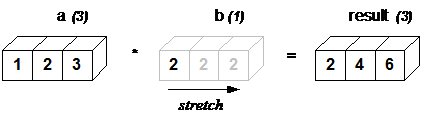

Такой же эффект работает и для многомерных массивов. Если по какому-то измерению размер у одного массива равен $1$, а у другого — произвольный, то по этому измерению может произойти "рястяжение". Таким образом, массивы можно умножать друг на друга, если в измерениях, где они по размеру не совпадают, хотя бы у одного размер $1$. Для других поэлементных операций правило аналогично.

Важно отметить, что размерности сопоставляются справа налево. Если их количество не совпадает, что массивы меньшей размерности сначала дополняются слева размерностями 1. Например, при сложении массива размера $4 \times 3$ с массивом размера $3$ последний сначала преобразуется в массив размера $1 \times 3$.

In [ ]:
a = np.array([[ 0,  0,  0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([0, 1, 2])

print(a + b)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


Схематично проведенную операцию можно визуализировать следующим образом.

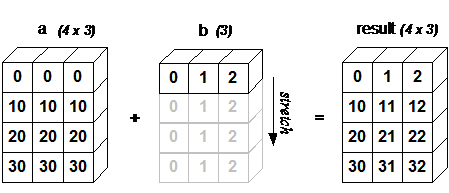


Если неединичные размерности справа не будут совпадать, то выполнить операцию уже не получится. Например, как приведено на схеме ниже.

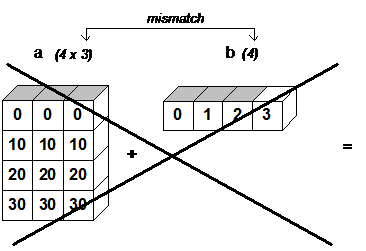


**Упражнение:**

Подумайте, массив какого размера получится, если перемножить массив $4 \times 1 \times 3$ и массив $12 \times 1$. Убедитесь на практике в правильности вашего ответа.

In [23]:
# решение
a = np.ones((4, 1, 3))
b = np.ones((12, 1))

mul_shape = (a * b).shape
print(mul_shape)

(4, 12, 3)


*Замечание*

Знать про broadcasting нужно, но пользоваться им надо с осторожностью. Многократное копирование массива при растяжении может привести к неэффективной работе программы по памяти. Особенно за этим приходится следить при работе с GPU.

## 4. Линейная алгебра

Все методы линейной алгебры в numpy начинаются с `numpy.linalg`.

In [25]:
a = np.array([[0, 1], [2, 3]])

In [28]:
det = np.linalg.det(a)    #определитель
print(det)
a1 = np.linalg.inv(a) #обратная матрица
print(a1)
print(a @ a1)
print(a1 @ a)

-2.0
[[-1.5  0.5]
 [ 1.   0. ]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


Решение линейной системы $ax=b$.

In [30]:
b = np.array([1, 5])
x = np.linalg.solve(a, b)
print(x)
a1@b #проверка

[1. 1.]


array([1., 1.])

Собственные значения и собственные векторы: $a u_i = \lambda_i u_i$. `l` — одномерный массив собственных значений $\lambda_i$, столбцы матрицы $u$ — собственные векторы $u_i$.

In [31]:
l, u = np.linalg.eig(a)
print(l)
print(u)

[-0.56155281  3.56155281]
[[-0.87192821 -0.27032301]
 [ 0.48963374 -0.96276969]]


Функция `diag` от одномерного массива строит диагональную матрицу; от квадратной матрицы — возвращает одномерный массив её диагональных элементов.

In [32]:
L = np.diag(l)
print(L)
print(np.diag(L))

[[-0.56155281  0.        ]
 [ 0.          3.56155281]]
[-0.56155281  3.56155281]


Все уравнения $a u_i = \lambda_i u_i$ можно собрать в одно матричное уравнение $a u = u \Lambda$, где $\Lambda$ — диагональная матрица с собственными значениями $\lambda_i$ по диагонали.

In [ ]:
print(a @ u - u @ L)

[[ 0.00000000e+00  0.00000000e+00]
 [ 1.66533454e-16 -4.44089210e-16]]


Поэтому $u^{-1} a u = \Lambda$.

In [ ]:
print(np.linalg.inv(u) @ a @ u)

[[-5.61552813e-01  2.77555756e-17]
 [-2.22044605e-16  3.56155281e+00]]


**Вопросы для самоконтроля**
- Какие методы позволяют вычислить опредлитель матрицы, обратную матрицу?
- Какой метод решает систему Ax=b?
- Какой метод возвращает кортеж из собственных значений и матрицы собственных векторов?

**Упражнение:**

в машинном обучении есть модель линейной регрессии, для которой "хорошее" решение считается по следующей формуле: $\widehat{\theta} = (X^T \cdot X + \lambda \cdot I_n)^{-1}\cdot X^T y$. Вычислите $\widehat{\theta}$ для $ X = \begin{pmatrix} -3 & 4 & 1 \\ 4 & 3 & 1  \end{pmatrix}$, $y = \begin{pmatrix} 10 \\ 12  \end{pmatrix}$, $I_n$ — единичная матрица размерности 3, $\lambda = 0.1$.

**Решение:**

In [33]:
X = np.array([[-3, 4, 1], [4, 3, 1]])
y = np.array([10, 12])
I = np.eye(3)
lambd = 0.1
theta = np.linalg.inv(X.T @ X + lambd * I) @ X.T @ y

## 5. Производительность numpy

Посмотрим на простой пример — сумма первых $10^8$ чисел.

In [ ]:
%%time

sum_value = 0
for i in range(10 ** 8):
    sum_value += i
print(sum_value)

4999999950000000
CPU times: user 11.5 s, sys: 10.3 ms, total: 11.5 s
Wall time: 11.6 s


Немного улучшеный код

In [ ]:
%%time

sum_value = sum(range(10 ** 8))
print(sum_value)

4999999950000000
CPU times: user 1.66 s, sys: 4.14 ms, total: 1.67 s
Wall time: 1.67 s


Код с использованием функций библиотеки `numpy`

In [ ]:
%%time

sum_value = np.arange(10 ** 8).sum()
print(sum_value)

4999999950000000
CPU times: user 170 ms, sys: 221 ms, total: 391 ms
Wall time: 395 ms


Простой и понятный код работает в $30$ раз быстрее!

Посмотрим на другой пример. Сгенерируем матрицу размера $500\times1000$, и вычислим средний минимум по колонкам.

Простой код, но при этом даже использующий некоторые питон-функции

*Замечание*. Далее с помощью `scipy.stats` происходит генерация случайных чисел из равномерного распределения на отрезке $[0, 1]$. Этот модуль будем изучать в следующем ноутбуке.

In [ ]:
import scipy.stats as sps

In [ ]:
%%time

N, M = 500, 1000
matrix = []
for i in range(N):
    matrix.append([sps.uniform.rvs() for j in range(M)])

min_col = [min([matrix[i][j] for i in range(N)]) for j in range(M)]
mean_min = sum(min_col) / N
print(mean_min)

0.003964031389280003
CPU times: user 17.7 s, sys: 26.9 ms, total: 17.7 s
Wall time: 17.7 s


Понятный код с использованием функций библиотеки numpy

In [ ]:
%%time

N, M = 500, 1000
matrix = sps.uniform.rvs(size=(N, M))
mean_min = matrix.min(axis=1).mean()
print(mean_min)

0.0010107557488341552
CPU times: user 37.2 ms, sys: 2.98 ms, total: 40.1 ms
Wall time: 40.3 ms


Простой и понятный код работает в 1500 раз быстрее!